In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Đọc file data
data = pd.read_csv('data of CFDST.csv', index_col='No')
data

,L (mm),Do (mm),to (mm),Di (mm),ti (mm),fyo (MPa),fyi (MPa),fc' (MPa),Pu
No,,,,,,,,,
1,230,75.4,1.29,62.7,1.23,486.0,470.0,46.2,348.0
2,230,75.2,1.19,62.4,1.20,486.0,470.0,46.2,348.0
3,230,76.3,1.78,62.0,1.00,486.0,470.0,46.2,395.0
4,230,76.3,1.74,62.0,0.94,512.0,470.0,46.2,395.0
5,230,81.5,1.11,62.7,1.14,524.0,470.0,46.2,386.0
...,...,...,...,...,...,...,...,...,...
163,570,190.1,4.21,59.3,3.30,336.8,342.1,37.5,2121.0
164,570,189.7,5.12,59.5,3.32,346.9,342.1,37.5,2473.0
165,570,188.8,5.08,59.5,3.31,346.9,342.1,37.5,2457.0


In [12]:
# Xem các chỉ số thống kê cơ bản
data.describe()

,L (mm),Do (mm),to (mm),Di (mm),ti (mm),fyo (MPa),fyi (MPa),fc' (MPa),Pu
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,851.526946,196.711976,3.235210,102.746108,2.591976,372.895808,373.197605,37.215329,1759.813293
std,669.170956,116.258151,1.328837,80.647278,1.028678,84.240543,77.340066,14.332229,1164.765921
min,230.000000,75.200000,0.590000,33.500000,0.550000,205.000000,205.000000,18.700000,283.000000
25%,400.000000,139.200000,2.245000,60.000000,2.000000,308.000000,320.250000,23.600000,865.300000
50%,570.000000,165.100000,3.000000,76.000000,2.900000,366.000000,366.000000,37.500000,1435.000000
75%,1002.000000,190.700000,4.010000,101.600000,3.085000,423.000000,418.000000,47.400000,2473.000000
max,3502.000000,603.400000,6.770000,402.100000,5.770000,549.000000,549.000000,67.320000,5383.500000


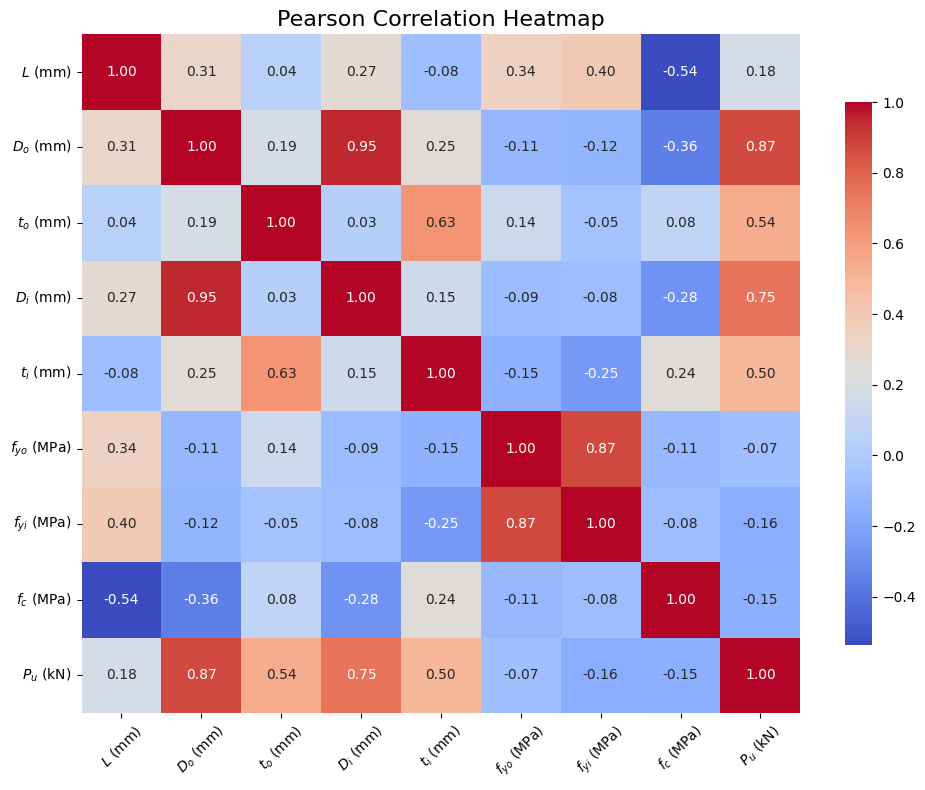

In [17]:

# Tính toán ma trận tương quan cho Pearson và Spearman
pearson_corr = data.corr(method='pearson')
new_labels = [
    r'$L$ (mm)', r'$D_{o}$ (mm)', r'$t_{o}$ (mm)',
    r'$D_{i}$ (mm)', r'$t_{i}$ (mm)',
    r'$f_{yo}$ (MPa)', r'$f_{yi}$ (MPa)',
    r'$f_{c}$ (MPa)', r'$P_{u}$ (kN)'
]
# Cập nhật tên hàng và cột cho Pearson
pearson_corr.index = new_labels
pearson_corr.columns = new_labels
# Plot heatmap Pearson Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': 0.8})
plt.title("Pearson Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



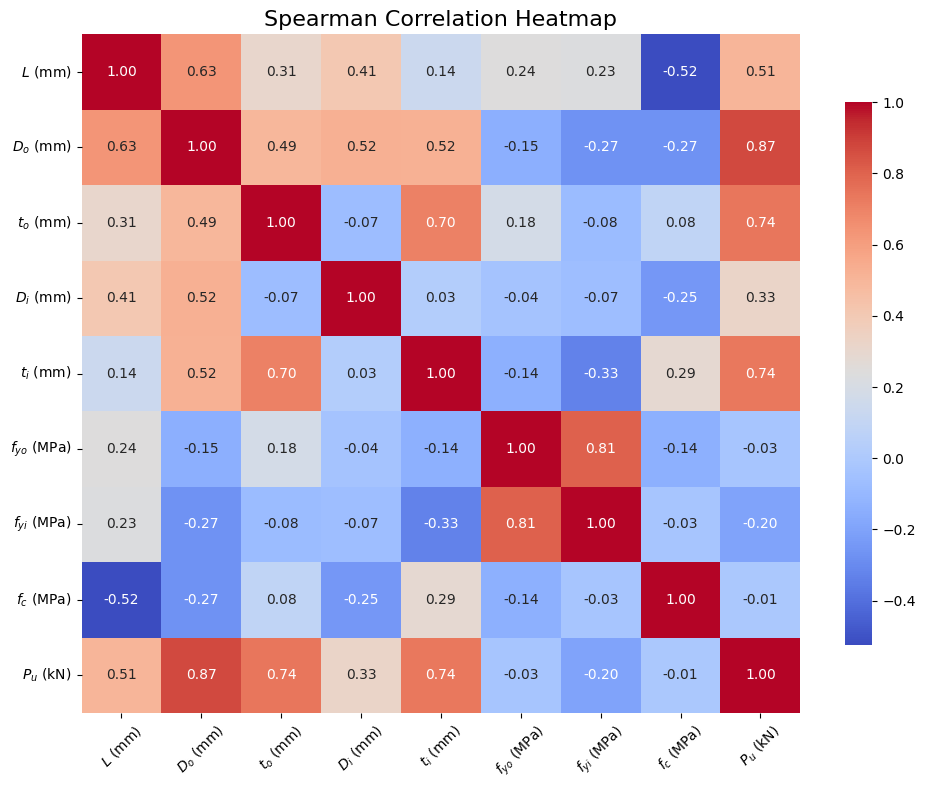

In [18]:
# Plot heatmap Spearman Correlation
spearman_corr = data.corr(method='spearman')
new_labels = [
    r'$L$ (mm)', r'$D_{o}$ (mm)', r'$t_{o}$ (mm)',
    r'$D_{i}$ (mm)', r'$t_{i}$ (mm)',
    r'$f_{yo}$ (MPa)', r'$f_{yi}$ (MPa)',
    r'$f_{c}$ (MPa)', r'$P_{u}$ (kN)'
]
# Cập nhật tên hàng và cột cho Spearman
spearman_corr.index = new_labels
spearman_corr.columns = new_labels
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': 0.8})
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


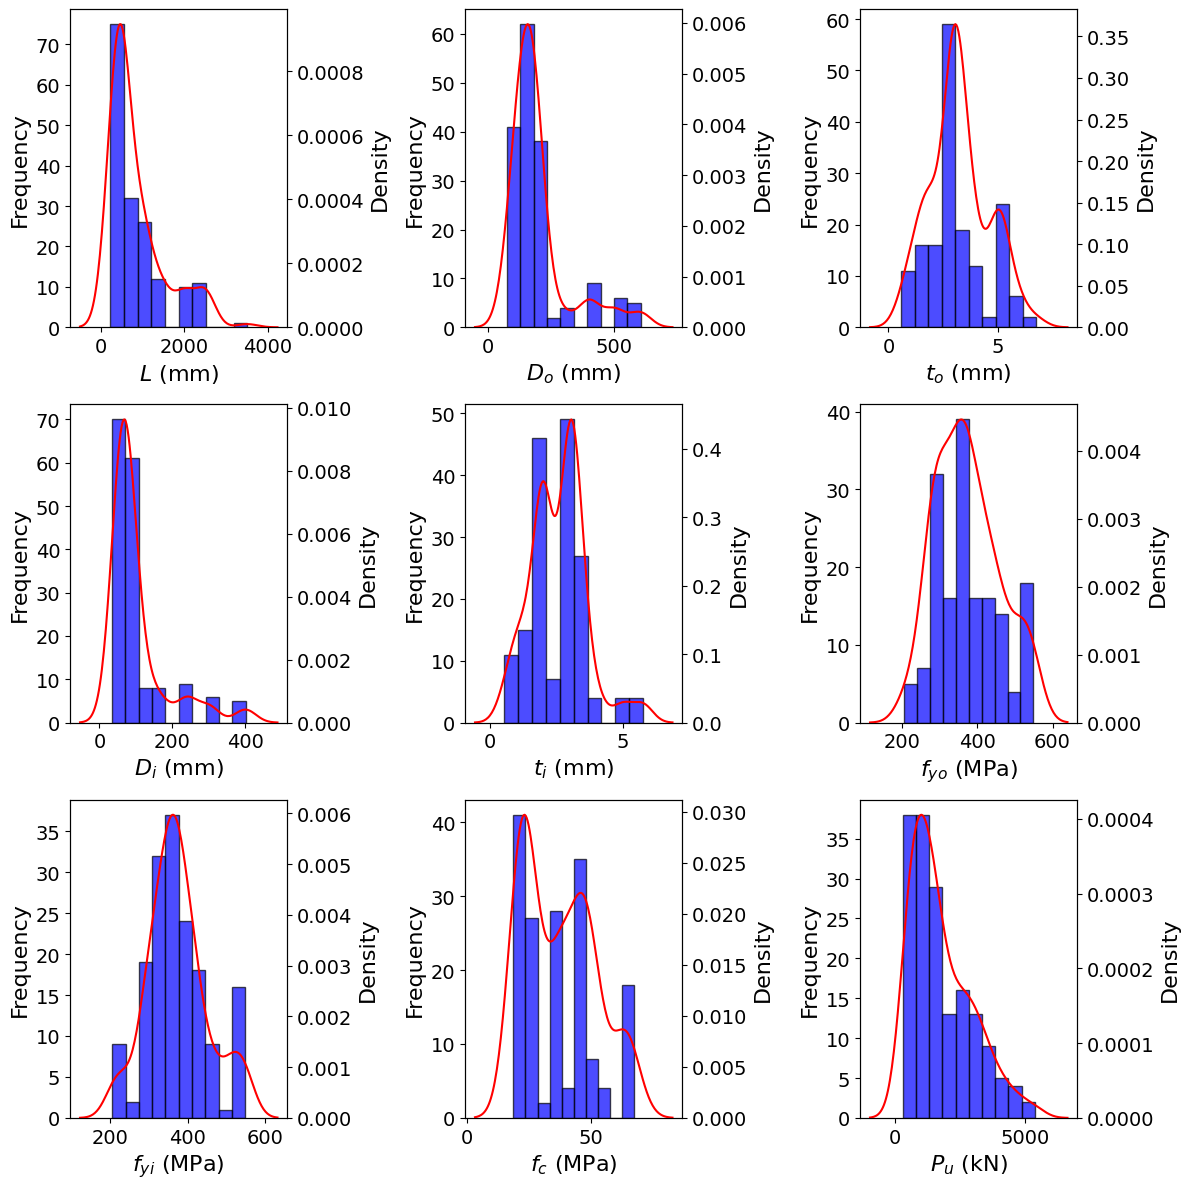

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
columns = data.columns
# Iterate through each column and its corresponding axis
for i, col in enumerate(columns):
    ax = axes[i]

    # Plot the histogram for frequency
    ax.hist(data[col], bins=10, alpha=0.7, color='blue', edgecolor='black', density=False)
    ax.set_xlabel(f'{new_labels[i]}', fontsize=16)#, fontname='Times New Roman')
    ax.set_ylabel('Frequency', fontsize=16)#, fontname='Times New Roman')

    # Create a secondary y-axis for density
    ax2 = ax.twinx()
    sns.kdeplot(data[col], ax=ax2, color='red')
    ax2.set_ylabel('Density', fontsize=16)#, fontname='Times New Roman')

    # Set font properties for ticks (numbers)
    ax.tick_params(axis='both', labelsize=14)
    ax2.tick_params(axis='both', labelsize=14)

    # for label in ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels():
    #     label.set_fontname('Times New Roman')

# Remove unused subplots and move the last plot to the 8th position
# for i in [8]:
#     fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
# plt.savefig('data_fem.svg', format='svg')
plt.show()

In [39]:
# Homework
from openseespy.opensees import *
def analysis_truss(b1, h1, b2, h2, b3, h3):
    s1 = b1*h1
    s2 = b2*h2
    s3 = b3*h3
    # ------------------------------
    # Start of model generation
    # -----------------------------

    # remove existing model
    wipe()

    # set modelbuilder
    model('basic', '-ndm', 2, '-ndf', 2)

    # create nodes
    node(1, 0.0, 0.0)
    node(2, 144.0,  0.0)
    node(3, 168.0,  0.0)
    node(4,  72.0, 96.0)

    # set boundary condition
    fix(1, 1, 1)
    fix(2, 1, 1)
    fix(3, 1, 1)

    # define materials
    uniaxialMaterial("Elastic", 1, 3000.0)

    # define elements
    element("Truss",1,1,4,s1,1)
    element("Truss",2,2,4,s2,1)
    element("Truss",3,3,4,s3,1)

    # create TimeSeries
    timeSeries("Linear", 1)

    # create a plain load pattern
    pattern("Plain", 1, 1)

    # Create the nodal load - command: load nodeID xForce yForce
    load(4, 100.0, -50.0)

    # ------------------------------
    # Start of analysis generation
    # ------------------------------

    # create SOE
    system("BandSPD")

    # create DOF number
    numberer("RCM")

    # create constraint handler
    constraints("Plain")

    # create integrator
    integrator("LoadControl", 1.0)

    # create algorithm
    algorithm("Linear")

    # create analysis object
    analysis("Static")

    # perform the analysis
    analyze(1)
    force_1 = abs(basicForce(1)[0])  # Element 1
    force_2 = abs(basicForce(2)[0])  # Element 1
    force_3 = abs(basicForce(3)[0])  # Element 1
    weight1 = 490*(s1/144)*10
    weight2 = 490*(s2/144)*10
    weight3 = 490*(s1/144)*11.3
    weight_all = round(weight1+weight2+weight3,2)
    return round(force_1/s1, 2), round(force_2/s2, 2), round(force_3/s3, 2), weight_all


In [42]:
analysis_truss(1.1, 1.1 ,5,5,5,5)

(30.3, 0.27, 4.19, 938.39)